# CESM2-Large Ensemble Reproduction of Kay et al. 2015

## Introduction
This Jupyter Notebook demonstrates how one might use the NCAR Community Earth System Model v2 (CESM2) Large Ensemble (CESM2-LE) data hosted on AWS S3. The notebook shows how to reproduce figure 2 from the Kay et al. (2015) paper describing the CESM LENS dataset ([doi:10.1175/BAMS-D-13-00255.1](doi:10.1175/BAMS-D-13-00255.1)), with the LENS2 dataset.

There was a previous notebook which explored this use case, put together by Joe Hamann and Anderson Banihirwe, accessible on the Pangeo Gallery using [this link](http://gallery.pangeo.io/repos/NCAR/cesm-lens-aws/notebooks/kay-et-al-2015.v3.html). The specific figure we are replicating is shown below.

![cesm1-lens](images/kay_et_al_2015_lens1.png)

With the CESM2-LE dataset, we have 100 members which span from 1850 to 2100; whereas the original LENS dataset's 40 member ensemble include data from 1920 to 2100. In this notebook, we include the ensemble spread from 1850 to 2100, comparing observations from the HADCRUT4 dataset when available. We also explore a more **interactive** version of this figure!


## Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
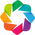

In [2]:
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import intake
import numpy as np
import pandas as pd
import xarray as xr
import hvplot.pandas, hvplot.xarray
import holoviews as hv
from distributed import LocalCluster, Client
hv.extension('bokeh')

## Spin up a Cluster

In [3]:
# If not using NCAR HPC, use the LocalCluster
cluster = LocalCluster()

client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 1.85 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38737,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 1.85 GiB
Comm: tcp://127.0.0.1:45513,Total threads: 1
Dashboard: http://127.0.0.1:36823/status,Memory: 474.75 MiB
Nanny: tcp://127.0.0.1:37917,


2024-06-11 21:53:52,566 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:53:54,677 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:53:54,697 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:53:55,297 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:41283 (pid=4376) exceeded 95% memory budget. Restarting...
2024-06-11 21:53:55,349 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:53:59,724 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:54:01,807 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:54:02,032 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:40213 (pid=4579) exceeded 95% memory budget. Restarting...
2024-06-11 21:54:02,075 - distributed.nanny - WARNING - Restarting worker
2024-06-11 21:54:02,397 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:40745 (pid=4583) exceeded 95% memory budget. Restarting...
2024-06-11 21:54:02,450 - distributed.nanny - W

## Read in Data

### Use the `Intake-ESM` Catalog to Access the Data

In [4]:
catalog = intake.open_esm_datastore(
    'https://raw.githubusercontent.com/NCAR/cesm2-le-aws/main/intake-catalogs/aws-cesm2-le.json'
)
catalog

,unique
variable,53
long_name,51
component,4
experiment,2
forcing_variant,2
frequency,3
vertical_levels,3
spatial_domain,3
units,20
start_time,4


### Subset for Daily Temperature Data (`TREFHT`)
We use [`Intake-ESM`](https://intake-esm.readthedocs.io/en/latest/) here to query for our dataset, focusing the smoothed biomass burning (smbb) experiment!

In [7]:
catalog_subset = catalog.search(long_name=["specific humidity", "maximum reference height temperature over output period", "temperature"])
catalog_subset

,unique
variable,3
long_name,3
component,1
experiment,2
forcing_variant,2
frequency,2
vertical_levels,2
spatial_domain,1
units,2
start_time,4


In [8]:
catalog_subset.df

,variable,long_name,component,experiment,forcing_variant,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,Q,specific humidity,atm,historical,cmip6,daily,32.0,global,kg/kg,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
1,T,temperature,atm,historical,cmip6,daily,32.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
2,TREFHTMX,maximum reference height temperature over outp...,atm,historical,cmip6,daily,1.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
3,Q,specific humidity,atm,historical,smbb,daily,32.0,global,kg/kg,1850-01-01 12:00:00,2015-01-01 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
4,T,temperature,atm,historical,smbb,daily,32.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
5,TREFHTMX,maximum reference height temperature over outp...,atm,historical,smbb,daily,1.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
6,Q,specific humidity,atm,ssp370,cmip6,daily,32.0,global,kg/kg,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
7,TREFHTMX,maximum reference height temperature over outp...,atm,ssp370,cmip6,daily,1.0,global,K,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
8,TREFHTMX,maximum reference height temperature over outp...,atm,ssp370,smbb,daily,1.0,global,K,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
9,Q,specific humidity,atm,historical,cmip6,monthly,32.0,global,kg/kg,1850-01-16 12:00:00,2014-12-16 12:00:00,s3://ncar-cesm2-lens/atm/monthly/cesm2LE-histo...


Taking a look at the dataframe, we see there are two files - one for the historical run, and the other a future scenario (ssp370)

In [9]:
catalog_subset.df

,variable,long_name,component,experiment,forcing_variant,frequency,vertical_levels,spatial_domain,units,start_time,end_time,path
0,Q,specific humidity,atm,historical,cmip6,daily,32.0,global,kg/kg,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
1,T,temperature,atm,historical,cmip6,daily,32.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
2,TREFHTMX,maximum reference height temperature over outp...,atm,historical,cmip6,daily,1.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
3,Q,specific humidity,atm,historical,smbb,daily,32.0,global,kg/kg,1850-01-01 12:00:00,2015-01-01 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
4,T,temperature,atm,historical,smbb,daily,32.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
5,TREFHTMX,maximum reference height temperature over outp...,atm,historical,smbb,daily,1.0,global,K,1850-01-01 12:00:00,2014-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-histori...
6,Q,specific humidity,atm,ssp370,cmip6,daily,32.0,global,kg/kg,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
7,TREFHTMX,maximum reference height temperature over outp...,atm,ssp370,cmip6,daily,1.0,global,K,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
8,TREFHTMX,maximum reference height temperature over outp...,atm,ssp370,smbb,daily,1.0,global,K,2015-01-01 12:00:00,2100-12-31 12:00:00,s3://ncar-cesm2-lens/atm/daily/cesm2LE-ssp370-...
9,Q,specific humidity,atm,historical,cmip6,monthly,32.0,global,kg/kg,1850-01-16 12:00:00,2014-12-16 12:00:00,s3://ncar-cesm2-lens/atm/monthly/cesm2LE-histo...


#### Load in our datasets using `.to_dataset_dict()`
We use `.to_dataset_dict()` to return a dictionary of datasets, which we can now use for the analysis

In [ ]:
dsets = catalog_subset.to_dataset_dict(storage_options={'anon':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency.forcing_variant'


2024-06-11 21:53:51,759 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 334.34 MiB -- Worker memory limit: 474.75 MiB
2024-06-11 21:53:51,795 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 337.34 MiB -- Worker memory limit: 474.75 MiB
2024-06-11 21:53:51,809 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more informati

Here are the keys for each dataset - you will notice they follow the `groupby attributes`, with `component.experiment.frequency.forcing_variant`, one for the future and the other historical here

In [9]:
dsets.keys()

dict_keys(['atm.historical.daily.smbb', 'atm.ssp370.daily.smbb', 'atm.historical.daily.cmip6', 'atm.ssp370.daily.cmip6'])

Let's load these into separate datasets, then merge these together!

In [10]:
historical_smbb = dsets['atm.historical.daily.smbb']
future_smbb = dsets['atm.ssp370.daily.smbb']

historical_cmip6 = dsets['atm.historical.daily.cmip6']
future_cmip6 = dsets['atm.ssp370.daily.cmip6']

Now, we can merged the historical and future scenarios. We will drop any members that do not include the full 1850-2100 output!

In [11]:
merge_ds_smbb = xr.concat([historical_smbb, future_smbb], dim='time')
merge_ds_smbb = merge_ds_smbb.dropna(dim='member_id')

merge_ds_cmip6= xr.concat([historical_cmip6, future_cmip6], dim='time')
merge_ds_cmip6 = merge_ds_cmip6.dropna(dim='member_id')

For ease of plotting, we convert the `cftime.datetime` times to regular `datetime`

In [12]:
merge_ds_smbb['time'] = merge_ds_smbb.indexes['time'].to_datetimeindex()
merge_ds_cmip6['time'] = merge_ds_cmip6.indexes['time'].to_datetimeindex()

Finally, we can load in **just** the variable we are interested in, Reference height temperature (`TREFHT`). We will separate this into two arrays:
* `t_smbb` - the **entire** period of data for the smoothed biomass burning experiment (1850 to 2100)
* `t_cmip6` - the **entire** period of data for the cmip6 biomass burning experiment (1850 to 2100)
* `t_ref` - the reference period used in the Kay et al. 2015 paper (1961 to 1990)

In [13]:
t_smbb = merge_ds_smbb.TREFHT
t_cmip6 = merge_ds_cmip6.TREFHT
t_ref = t_cmip6.sel(time=slice('1961', '1990'))

### Read in the Grid Data

We also have Zarr stores of grid data, such as the area of each grid cell. We will need to follow a similar process here, querying for our experiment and extracting the dataset

In [15]:
grid_subset = catalog.search(component='atm', frequency='static', experiment='historical', forcing_variant='cmip6')

We can load in the dataset, calling `pop_item`, which grabs the dataset, assigning `_` to the meaningless key

In [16]:
_, grid = grid_subset.to_dataset_dict(aggregate=False, zarr_kwargs={"consolidated": True}, storage_options={'anon':True}).popitem()
grid


--> The keys in the returned dictionary of datasets are constructed as follows:
	'variable.long_name.component.experiment.forcing_variant.frequency.vertical_levels.spatial_domain.units.start_time.end_time.path'


<xarray.Dataset>
Dimensions:   (lat: 192, lon: 288, ilev: 31, lev: 30, bnds: 2, slat: 191, slon: 288)
Coordinates: (12/21)
    P0        float64 ...
    area      (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    gw        (lat) float64 dask.array<chunksize=(192,), meta=np.ndarray>
    hyai      (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hyam      (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybi      (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    ...        ...
    ntrn      int32 ...
  * slat      (slat) float64 -89.53 -88.59 -87.64 -86.7 ... 87.64 88.59 89.53
  * slon      (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
    time      object ...
    w_stag    (slat) float64 dask.array<chunksize=(191,), meta=np.ndarray>
    wnummax   (lat) int32 dask.array<chunksize=(192,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    *empty*
Attributes:
    intake_esm_varname:      None
    intake_esm_dataset_key:  nan.nan.atm.historical.cmip6.static.nan.global.n...

### Extract the Grid Area and Compute the Total Area
Here, we extract the grid area and compute the total area across all grid cells - this will help when computing the weights...

In [17]:
cell_area = grid.area.load()
total_area = cell_area.sum()
cell_area

<xarray.DataArray 'area' (lat: 192, lon: 288)>
array([[2.9948368e+07, 2.9948368e+07, 2.9948368e+07, ..., 2.9948368e+07,
        2.9948368e+07, 2.9948368e+07],
       [2.3957478e+08, 2.3957478e+08, 2.3957478e+08, ..., 2.3957478e+08,
        2.3957478e+08, 2.3957478e+08],
       [4.7908477e+08, 4.7908477e+08, 4.7908477e+08, ..., 4.7908477e+08,
        4.7908477e+08, 4.7908477e+08],
       ...,
       [4.7908477e+08, 4.7908477e+08, 4.7908477e+08, ..., 4.7908477e+08,
        4.7908477e+08, 4.7908477e+08],
       [2.3957478e+08, 2.3957478e+08, 2.3957478e+08, ..., 2.3957478e+08,
        2.3957478e+08, 2.3957478e+08],
       [2.9948368e+07, 2.9948368e+07, 2.9948368e+07, ..., 2.9948368e+07,
        2.9948368e+07, 2.9948368e+07]], dtype=float32)
Coordinates:
    P0       float64 nan
    area     (lat, lon) float32 2.995e+07 2.995e+07 ... 2.995e+07 2.995e+07
    gw       (lat) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    ntrk     int32 0
    ntrm     int32 0
    ntrn     int32 0
    time     object 1850-02-01 00:00:00
    wnummax  (lat) int32 1543505128 10970 1543505128 ... 2146959360 0 2146959360
Attributes:
    cell_methods:  time: mean
    long_name:     area of grid box
    units:         m2

## Compute the Weighted Annual Averages
Here, we utilize the `resample(time="AS")` method which does an annual resampling based on start of calendar year.

Note we ***also*** weight by the cell area, multiplying each value by the corresponding cell area, summing over the grid (`lat`, `lon`), then dividing by the total area

### Setup the Computation - Below, we lazily prepare the calculation!
You'll notice how quickly this cell runs - which is suspicious 👀 - we didn't **actually** do any computation, but rather **prepared** the calculation

In [18]:
%%time
t_ref_ts = (
    (t_ref.resample(time="AS").mean("time")).weighted(cell_area).mean(('lat', 'lon'))
).mean(dim=("time", "member_id"))

t_smbb_ts = (
    (t_smbb.resample(time="AS").mean("time")).weighted(cell_area).mean(('lat', 'lon')))

t_cmip6_ts = (
    (t_cmip6.resample(time="AS").mean("time")).weighted(cell_area).mean(('lat', 'lon')))

CPU times: user 1.63 s, sys: 20.7 ms, total: 1.65 s
Wall time: 1.74 s


### Compute the Averages
At this point, we actually compute the averages - using `%%time` to help us measure how long it takes to compute...

In [19]:
%%time
t_ref_mean = t_ref_ts.compute()

CPU times: user 17.5 s, sys: 552 ms, total: 18 s
Wall time: 41.4 s


In [20]:
%%time
t_smbb_mean = t_smbb_ts.compute()

CPU times: user 1min 37s, sys: 3.41 s, total: 1min 41s
Wall time: 3min 14s


In [21]:
%%time
t_cmip6_mean = t_cmip6_ts.compute()

CPU times: user 2min 32s, sys: 4.84 s, total: 2min 37s
Wall time: 5min 36s


### Convert to Dataframes
Our output data format is still an `xarray.DataArray` which isn't neccessarily ideal... we **could** convert this to a dataframe which would be easier to export.

For example, you could call `anomaly_smbb.to_csv('some_output_file.csv')` to export to csv, which you could then share with others!

We can convert our `xarray.DataArray` to a pandas dataframe using the following:

In [29]:
t_smbb_ts_df = t_smbb_mean.to_series().unstack().T
t_cmip6_ts_df = t_cmip6_mean.to_series().unstack().T

Now that we have our dataframes, we can compute the anomaly by subtracting the mean value `t_ref_mean`

In [30]:
anomaly_smbb = (t_smbb_ts_df - t_ref_mean.data)
anomaly_cmip6 = (t_cmip6_ts_df - t_ref_mean.data)

## Grab some Observational Data
In this case, we use the HADCRUT4 dataset. We include the url here, which can be used to remotely access the data.

In [31]:
# Observational time series data for comparison with ensemble average
obsDataURL = "https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/cru/hadcrut4/air.mon.anom.median.nc"

In [32]:
ds = xr.open_dataset(obsDataURL).load()
ds

<xarray.Dataset>
Dimensions:    (lat: 36, lon: 72, time: 2061, nbnds: 2)
Coordinates:
  * lat        (lat) float32 87.5 82.5 77.5 72.5 ... -72.5 -77.5 -82.5 -87.5
  * lon        (lon) float32 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * time       (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2021-09-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] 1850-01-01 1850-01-31 ... 2021-09-30
    air        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    platform:                        Surface
    title:                           HADCRUT4 Combined Air Temperature/SST An...
    history:                         Originally created at NOAA/ESRL PSD by C...
    Conventions:                     CF-1.0
    Comment:                         This dataset supersedes V3
    Source:                          Obtained from http://hadobs.metoffice.co...
    version:                         4.2.0
    dataset_title:                   HadCRUT4
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    DODS_EXTRA.Unlimited_Dimension:  time

### Compute the Weighted Temporal Mean from Seasons
This observational dataset comes in as seasonal values, but we want yearly averages.. this requires weighting by the length of each season, so we include this helper function, `weighted_temporal_mean`!

In [33]:
def weighted_temporal_mean(ds):
    """
    weight by days in each month
    """
    time_bound_diff = ds.time_bnds.diff(dim="nbnds")[:, 0]
    wgts = time_bound_diff.groupby("time.year") / time_bound_diff.groupby(
        "time.year"
    ).sum(xr.ALL_DIMS)
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)
    obs = ds["air"]
    cond = obs.isnull()
    ones = xr.where(cond, 0.0, 1.0)
    obs_sum = (obs * wgts).resample(time="AS").sum(dim="time")
    ones_out = (ones * wgts).resample(time="AS").sum(dim="time")
    obs_s = (obs_sum / ones_out).mean(("lat", "lon")).to_series()
    return obs_s

Let's apply this to our dataset now!

In [34]:
obs_s = weighted_temporal_mean(ds)
obs_s

time
1850-01-01   -0.338822
1851-01-01   -0.245482
1852-01-01   -0.291014
1853-01-01   -0.342457
1854-01-01   -0.276820
                ...   
2017-01-01    0.777498
2018-01-01    0.641953
2019-01-01    0.809306
2020-01-01    0.865248
2021-01-01    0.677946
Freq: AS-JAN, Length: 172, dtype: float64

### Convert the dataset into a dataframe

In [35]:
obs_df = pd.DataFrame(obs_s).rename(columns={0:'value'})
obs_df

,value
time,
1850-01-01,-0.338822
1851-01-01,-0.245482
1852-01-01,-0.291014
1853-01-01,-0.342457
1854-01-01,-0.276820
...,...
2017-01-01,0.777498
2018-01-01,0.641953
2019-01-01,0.809306


## Plot the Output
In this this case, we use [`hvPlot`](https://hvplot.holoviz.org/index.html) to plot the output! We setup the plots in the following cell

In [36]:
smbb_plot = (
    anomaly_smbb.hvplot.scatter(
        'time',
        height=300,
        width=500,
        color='lightgrey',
        legend=False,
        xlabel='Year',
        ylabel='Global Mean \n Temperature Anomaly (K)',
        ylim=(-1, 5),
        hover=False,
    )
    * anomaly_smbb.mean(1).hvplot.line('time', color='k', line_width=3, label='ensemble mean')
    * obs_df.hvplot.line('time', color='red', label='observations')
).opts(title='Smoothed Biomass Burning')


cmip6_plot = (
    anomaly_cmip6.hvplot.scatter(
        'time',
        height=300,
        width=500,
        color='lightgrey',
        legend=False,
        xlabel='Year',
        ylabel='Global Mean \n Temperature Anomaly (K)',
        ylim=(-1, 5),
        hover=False,
    )
    * anomaly_cmip6.mean(1).hvplot.line('time', color='k', line_width=3, label='ensemble mean')
    * obs_df.hvplot.line('time', color='red', label='observations').opts(
        title='CMIP6 Biomass Burning'
    )
)

# Include both plots in the same column
(smbb_plot + cmip6_plot).cols(1)

:Layout
   .Overlay.I  :Overlay
      .NdOverlay.I         :NdOverlay   [member_id]
         :Scatter   [time]   (value)
      .Curve.Ensemble_mean :Curve   [time]   (0)
      .Curve.Observations  :Curve   [time]   (value)
   .Overlay.II :Overlay
      .NdOverlay.I         :NdOverlay   [member_id]
         :Scatter   [time]   (value)
      .Curve.Ensemble_mean :Curve   [time]   (0)
      .Curve.Observations  :Curve   [time]   (value)

## Spin Down the Cluster
After we are done, we can spin down our cluster

In [37]:
cluster.close()
client.close()